Activity Description:
Jio fibre wants to implement AI/ML in their systems. The activity task is to build a network intrusion detector, a predictive model capable of distinguishing between ``bad&#39;&#39; connections, called intrusions or attacks, and ``good&#39;&#39; normal connections. 
This database contains a standard set of data to be audited, which includes a wide variety of intrusions in the network environment. Your target is building a machine efficient learning model using probabilistic approach models, probabilities of bad or good connections using naïve bayes model. This is a multi-class classification. 
Fine tune the model and make a model which has at least 97 percent accuracy.

In [1]:
# import relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# import train data set
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\tcp-connection.csv")

In [3]:
df.shape

(494021, 42)

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate          

In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
df.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serrer_rate                   51
rerror_rate                       77
s

In [9]:
df.intrusion.value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [10]:
# The columns 'num_outbound_cmds','is_host_login' contains only 0 values in all rows. Hence these columns are dropped

In [11]:
df.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [12]:
#The data set contains a total of 22 attack types 

# Data Normalization

In [13]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [14]:
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns

In [15]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [16]:
# calling the normalization() function
df1 = normalization(df.copy(),numeric_col)

In [17]:
# data after normalization
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.067792,b'udp',b'domain_u',b'SF',-0.003017,-0.022232,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.939885,-0.276984,-0.191341,-1.229844,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,b'normal.'
1,-0.067792,b'tcp',b'smtp',b'SF',-0.001555,-0.014635,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.685264,0.599396,-0.282867,-0.835087,0.316060,-0.464418,-0.463202,-0.25204,-0.249464,b'normal.'
2,-0.067792,b'icmp',b'ecr_i',b'SF',-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,b'smurf.'
3,-0.067792,b'icmp',b'ecr_i',b'SF',-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,b'smurf.'
4,-0.067792,b'tcp',b'private',b'S0',-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.722606,-1.786306,0.357813,-1.250621,-0.158629,2.163063,2.162027,-0.25204,-0.249464,b'neptune.'


In [18]:
x= df1.iloc[:,:-1]

In [19]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.067792,b'udp',b'domain_u',b'SF',-0.003017,-0.022232,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.443669,-0.939885,-0.276984,-0.191341,-1.229844,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
1,-0.067792,b'tcp',b'smtp',b'SF',-0.001555,-0.014635,-0.006673,-0.04772,-0.002571,-0.044136,...,-3.513316,-0.685264,0.599396,-0.282867,-0.835087,0.316060,-0.464418,-0.463202,-0.25204,-0.249464
2,-0.067792,b'icmp',b'ecr_i',b'SF',-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,...,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
3,-0.067792,b'icmp',b'ecr_i',b'SF',-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,...,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
4,-0.067792,b'tcp',b'private',b'S0',-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,...,0.347967,-1.722606,-1.786306,0.357813,-1.250621,-0.158629,2.163063,2.162027,-0.25204,-0.249464


In [20]:
y=df1.iloc[:,-1:]

In [21]:
y.head()

,intrusion
0,b'normal.'
1,b'normal.'
2,b'smurf.'
3,b'smurf.'
4,b'neptune.'


The intrusion is divided in to 5 classes 
1.Normal 
Normal(97278) 
2.DOS 
Smurf(280790), Neptune(107201), Back(2203), Teardrop(979), Pod(264), Land(21)
3.U2R 
Buffer_overflow(30), Rootkit(10), loadmodule(9), perl(3) 
4.R2L
Warezclient(1020), Guess_passwd(53), Warezmaster(20), Imap(12), ftp_write(8), Multihop(7), Phf(4), 
5.Spy(2)
Satan(1589), Ipsweep(1247), Portsweep(1040), bmap(231)

In [22]:
import string
y.intrusion = y.intrusion.str.replace("'"," ")

In [23]:
y['intrusion'] = y['intrusion'].str.replace(" ","")



In [24]:
y['intrusion'] = y['intrusion'].str.replace('.', '')

C:\Users\HP\AppData\Local\Temp/ipykernel_13344/1913902104.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y['intrusion'] = y['intrusion'].str.replace('.', '')


In [25]:
y.head()

,intrusion
0,bnormal
1,bnormal
2,bsmurf
3,bsmurf
4,bneptune


In [26]:
mapping={'bnormal':'Normal','bsmurf':'DOS','bneptune':'DOS','bback':'DOS','bteardrop':'DOS','bpod':'DOS','bland':'DOS',
        'bbuffer_overflow':'U2R','brootkit':'U2R','bloadmodule':'U2R','bperl':'U2R','bwarezclient':'R2L',
        'bguess_passwd':'R2L','bwarezmaster':'R2L','bimap':'R2L','bftp_write':'R2L','bmultihop':'R2L',
        'bphf':'R2L','bspy':'R2L','bsatan':'Spy(2)','bipsweep':'Spy(2)','bportsweep':'Spy(2)','bnmap':'Spy(2)'}


In [27]:
y['intrusion_class']=y['intrusion'].apply(lambda v:mapping[v])

In [28]:
y.drop(['intrusion'],axis=1,inplace= True)

In [29]:
y.value_counts()

intrusion_class
DOS                391458
Normal              97278
Spy(2)               4107
R2L                  1126
U2R                    52
dtype: int64

In [30]:
y.dtypes


intrusion_class    object
dtype: object

In [31]:
#visualize the count of good and bad connections using Seaborn

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


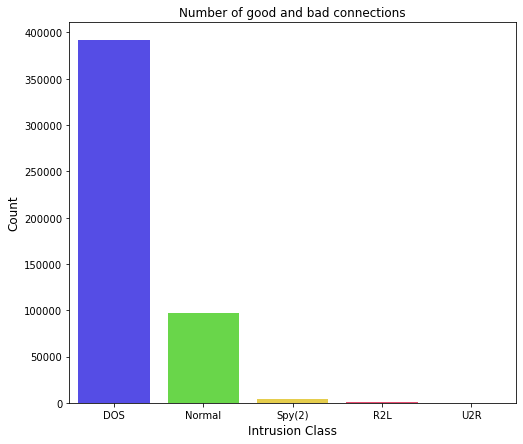

In [32]:
count = y['intrusion_class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Intrusion Class', fontsize=12)
plt.title('Number of good and bad connections')

plt.show()

In [ ]:
# Good Connections are indicated as Normal all others bolog to bad connections 

Data Manipulation The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number. This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the y.describe() method, we saw that the column intrusion_class is of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [33]:
y= y.astype('category')
y.dtypes

intrusion_class    category
dtype: object

# One-hot-encoding

In [34]:
#use One-Hot Encoding to convert categorical values to ordinal.

In [35]:
y = pd.get_dummies(data=y, columns=['intrusion_class'])
y.head()

,intrusion_class_DOS,intrusion_class_Normal,intrusion_class_R2L,intrusion_class_Spy(2),intrusion_class_U2R
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [36]:
# Encoding categorical data attributes 'protocol_type','service','flag' using Label Encoding

In [37]:
# Since the number of categorical feature is less in protocol_type we apply one hot encoding to convert the data

In [38]:
x = pd.get_dummies(data=x, columns=['protocol_type'])
x.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_b'icmp',protocol_type_b'tcp',protocol_type_b'udp'
0,-0.067792,b'domain_u',b'SF',-0.003017,-0.022232,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.191341,-1.229844,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,0,0,1
1,-0.067792,b'smtp',b'SF',-0.001555,-0.014635,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.282867,-0.835087,0.316060,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0
2,-0.067792,b'ecr_i',b'SF',-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1,0,0
3,-0.067792,b'ecr_i',b'SF',-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1,0,0
4,-0.067792,b'private',b'S0',-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.357813,-1.250621,-0.158629,2.163063,2.162027,-0.25204,-0.249464,0,1,0


In [39]:
# Since the number of categorical feature is more 'service' and 'flag' columns we apply Lablel Encoding to convert the data

In [40]:
obj_cols = x.select_dtypes(include='object').columns
obj_cols

Index(['service', 'flag'], dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for each in obj_cols:
    x[each] = le.fit_transform(x[each])

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  float64
 1   service                      494021 non-null  int32  
 2   flag                         494021 non-null  int32  
 3   src_bytes                    494021 non-null  float64
 4   dst_bytes                    494021 non-null  float64
 5   land                         494021 non-null  float64
 6   wrong_fragment               494021 non-null  float64
 7   urgent                       494021 non-null  float64
 8   hot                          494021 non-null  float64
 9   num_failed_logins            494021 non-null  float64
 10  logged_in                    494021 non-null  float64
 11  num_compromised              494021 non-null  float64
 12  root_shell                   494021 non-null  float64
 13 

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [44]:
x_train.shape

(370515, 41)

In [45]:
#Standard Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)

In [47]:
x.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_b'icmp',protocol_type_b'tcp',protocol_type_b'udp'
0,-0.067792,11,9,-0.003017,-0.022232,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.191341,-1.229844,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,0,0,1
1,-0.067792,50,9,-0.001555,-0.014635,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.282867,-0.835087,0.316060,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0
2,-0.067792,14,9,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1,0,0
3,-0.067792,14,9,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,1,0,0
4,-0.067792,45,5,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,...,0.357813,-1.250621,-0.158629,2.163063,2.162027,-0.25204,-0.249464,0,1,0


# Decision Tree Classsifier

Decision tree classifier – A decision tree classifier is a systematic approach for multiclass classification.

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = dt.predict(x_test)
print('Accuracy of Decision Tree model classifier is :',accuracy_score(y_test,y_pred))

Accuracy of Decision Tree model classifier is : 0.9936926141240102
